In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [2]:
df = pd.read_csv('DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv')
df

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
0                       289                               36            13   
1                       118                               13            18   
2                       179                               51            18   
3                       279                                5            14   
4                       289                               36            13   
..                      ...                              ...           ...   
735                     289                               36            13   
736                     235                               11            14   
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Average/day   ...  Disciplinary failure  Education  Son  \
0     33                 239.554  ...                     0          1    2   
1     50                 239.554  ...                     1          1    1   
2     38                 239.554  ...                     0          1    0   
3     39                 239.554  ...                     0          1    2   
4     33                 239.554  ...                     0          1    2   
..   ...                     ...  ...                   ...        ...  ...   
735   33                 264.604  ...                     0          1    2   
736   37                 264.604  ...                     0          3    1   
737   40                 271.219  ...                     0          1    1   
738   39                 271.219  ...                     0          1    2   
739   53                 271.219  ...                     0          1    1   

     Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0                 1              0    1      90     172               30   
1                 1              0    0      98     178               31   
2                 1              0    0      89     170               31   
3                 1              1    0      68     168               24   
4                 1              0    1      90     172               30   
..              ...            ...  ...     ...     ...              ...   
735               1              0    1      90     172               30   
736               0              0    1      88     172               29   
737               1              0    8      98     170               34   
738               1              0    2     100     170               35   
739               0              0    1      77     175               25   

     Absenteeism time in hours  
0                            4  
1                            0  
2                            2  
3                            4  
4                            2  
..                         ...  
735                          8  
736                          4  
737     

In [3]:
print(df.shape)

(740, 21)


In [4]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [5]:
df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0                 239.554  ...                     0          1    2   
1                 239.554  ...                     1          1    1   
2                 239.554  ...                     0          1    0   
3                 239.554  ...                     0          1    2   
4                 239.554  ...                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  

[5 rows x 21 columns]

In [6]:
df.tail()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
735                     289                               36            13   
736                     235                               11            14   
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Average/day   ...  Disciplinary failure  Education  Son  \
735   33                 264.604  ...                     0          1    2   
736   37                 264.604  ...                     0          3    1   
737   40                 271.219  ...                     0          1    1   
738   39                 271.219  ...                     0          1    2   
739   53                 271.219  ...                     0          1    1   

     Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
735               1              0    1      90     172               30   
736               0              0    1      88     172               29   
737               1              0    8      98     170               34   
738               1              0    2     100     170               35   
739               0              0    1      77     175               25   

     Absenteeism time in hours  
735                          8  
736                          4  
737                          0  
738                          0  
739                          0  

[5 rows x 21 columns]

In [7]:
df.describe()

ID  Reason for absence  Month of absence  Day of the week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223                        14.836788   
min      1.000000              118.000000                         5.000000   
25%      2.000000              179.000000                        16.000000   
50%      3.000000              225.000000                        26.000000   
75%      4.000000              260.000000                        50.000000   
max      4.000000              388.000000                        52.000000   

       Service time         Age  Work load Average/day   ...  \
count    740.000000  740.000000              740.000000  ...   
mean      12.554054   36.450000              271.490235  ...   
std        4.384873    6.478772               39.058116  ...   
min        1.000000   27.000000              205.917000  ...   
25%        9.000000   31.000000              244.387000  ...   
50%       13.000000   37.000000              264.249000  ...   
75%       16.000000   40.000000              294.217000  ...   
max       29.000000   58.000000              378.884000  ...   

       Disciplinary failure   Education         Son  Social drinker  \
count            740.000000  740.000000  740.000000      740.000000   
mean               0.054054    1.291892    1.018919        0.567568   
std                0.226277    0.673238    1.098489        0.495749   
min                0.000000    1.000000    0.000000        0.000000   
25%                0.000000    1.000000    0.000000        0.000000   
50%                0.000000    1.000000    1.000000        1.000000   
75%                0.000000    1.000000    2.000000        1.000000   
max                1.000000    4.000000    4.000000        1.000000   

       Social smoker         Pet      Weight      Height  Body mass index  \
count     740.000000  740.000000  740.000000  740.000000       740.000000   
mean        0.072973    0.745946   79.035135  172.114865        26.677027   
std         0.260268    1.318258   12.883211    6.034995         4.285452   
min         0.000000    0.000000   56.000000  163.000000        19.000000   
25%         0.000000    0.000000   69.000000  169.000000        24.000000   
50%         0.000000    0.000000   83.000000  170.000000        25.000000   
75%         0.000000    1.000000   89.000000  172.000000        31.000000   
max         1.000000    8.000000  108.000000  196.000000        38.000000   

       Absenteeism time in hours  
count                 740.000000  
mean                    6.924324  
std                    13.330998  
min                     0.000000  
25%                     2.000000  
50%                     3.000000  
75%                     8.000000  
max                   120.000000  

[8 rows x 21 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

#### preprocessing

In [9]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [10]:
for i in df.columns:
    u = df[i].unique()
    print('unique in :', i, '==>', u)

unique in : ID ==> [11 36  3  7 10 20 14  1 24  6 33 18 30  2 19 27 34  5 15 29 28 13 22 17
 31 23 32  9 26 21  8 25 12 16  4 35]
unique in : Reason for absence ==> [26  0 23  7 22 19  1 11 14 21 10 13 28 18 25 24  6 27 17  8 12  5  9 15
  4  3  2 16]
unique in : Month of absence ==> [ 7  8  9 10 11 12  1  2  3  4  5  6  0]
unique in : Day of the week ==> [3 4 5 6 2]
unique in : Seasons ==> [1 4 2 3]
unique in : Transportation expense ==> [289 118 179 279 361 260 155 235 246 189 248 330 157 291 184 225 369 388
 378 228 300 268 231 233]
unique in : Distance from Residence to Work ==> [36 13 51  5 52 50 12 11 25 29 16 27 42 10 20 31 26 17 22 15 49 48 14 35
 45]
unique in : Service time ==> [13 18 14  3 11 16  4  6 12  7 10  9 17 29  8  1 15 24]
unique in : Age ==> [33 50 38 39 28 36 34 37 41 47 29 48 32 27 43 40 31 30 49 58 46 53]
unique in : Work load Average/day  ==> [239.554 205.917 241.476 253.465 306.345 261.306 308.593 302.585 343.253
 326.452 378.884 377.55  275.312 265.615 294.21

#### Scaling (feature transformation)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1 = pd.DataFrame(sc.fit_transform(df), columns=df.columns)
df1

ID  Reason for absence  Month of absence  Day of the week  \
0   -0.637161            0.804938          0.196763        -0.643947   
1    1.632719           -2.280124          0.196763        -0.643947   
2   -1.363523            0.448970          0.196763         0.059924   
3   -1.000342           -1.449530          0.196763         0.763796   
4   -0.637161            0.448970          0.196763         0.763796   
..        ...                 ...               ...              ...   
735 -0.637161           -0.618937          0.196763        -0.643947   
736 -1.545113           -0.974905          0.196763        -0.643947   
737 -1.272728           -2.280124         -1.841698        -0.643947   
738 -0.909547           -2.280124         -1.841698         0.059924   
739  1.541923           -2.280124         -1.841698         1.467667   

      Seasons  Transportation expense  Distance from Residence to Work  \
0   -1.390175                1.011408                         0.429556   
1   -1.390175               -1.544379                        -1.121694   
2   -1.390175               -0.632665                         1.441240   
3   -1.390175                0.861947                        -1.661258   
4   -1.390175                1.011408                         0.429556   
..        ...                     ...                              ...   
735 -1.390175                1.011408                         0.429556   
736 -1.390175                0.204318                        -1.256585   
737 -1.390175               -1.544379                        -1.054248   
738 -0.490149                0.144533                         0.362110   
739  0.409877               -0.632665                         1.036566   

     Service time       Age  Work load Average/day   ...  \
0        0.101770 -0.532868               -0.818212  ...   
1        1.242825  2.092860               -0.818212  ...   
2        1.242825  0.239405               -0.818212  ...   
3        0.329981  0.393859               -0.818212  ...   
4        0.101770 -0.532868               -0.818212  ...   
..            ...       ...                     ...  ...   
735      0.101770 -0.532868               -0.176427  ...   
736      0.329981  0.084950               -0.176427  ...   
737      0.101770  0.548314               -0.006949  ...   
738      0.329981  0.393859               -0.006949  ...   
739      0.329981  2.556224               -0.006949  ...   

     Disciplinary failure  Education       Son  Social drinker  Social smoker  \
0               -0.239046  -0.433857  0.893723        0.872872      -0.280566   
1                4.183300  -0.433857 -0.017234        0.872872      -0.280566   
2               -0.239046  -0.433857 -0.928191        0.872872      -0.280566   
3               -0.239046  -0.433857  0.893723        0.872872       3.564226   
4               -0.239046  -0.433857  0.893723        0.872872      -0.280566   
..                    ...        ...       ...             ...            ...   
735             -0.239046  -0.433857  0.893723        0.872872      -0.280566   
736             -0.239046   2.538869 -0.017234       -1.145644      -0.280566   
737             -0.239046  -0.433857 -0.017234        0.872872      -0.280566   
738             -0.239046  -0.433857  0.893723        0.872872      -0.280566   
739             -0.239046  -0.433857 -0.017234       -1.145644      -0.280566   

          Pet    Weight    Height  Body mass index  Absenteeism time in hours  
0    0.192850  0.851673 -0.019046         0.775932                  -0.219511  
1   -0.566240  1.473056  0.975828         1.009438                  -0.519767  
2   -0.566240  0.774000 -0.350671         1.009438                  -0.369639  
3   -0.566240 -0.857131 -0.682295        -0.625100                  -0.219511  
4    0.192850  0.851673 -0.019046         0.775932                  -0.369639  
..        ...       ...       ...              ...                        ...  
735

In [12]:
df1.drop('ID',axis=1,inplace=True)

### EDA 

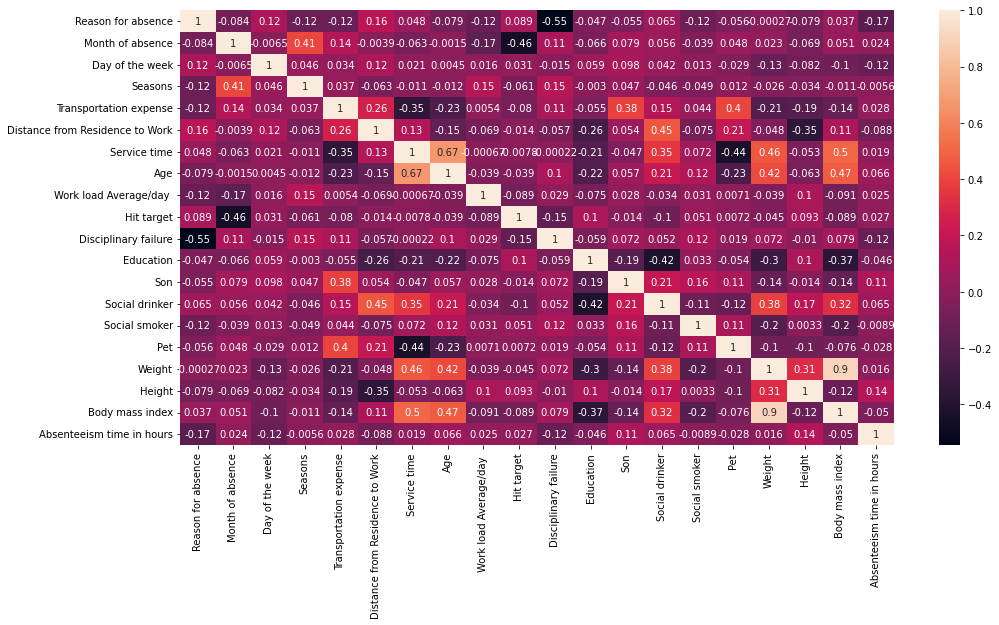

In [13]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(df1.corr(), annot=True);

#### conclusion:
    - strong correlation in some features

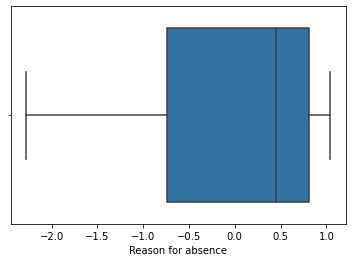

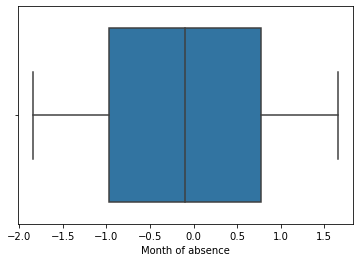

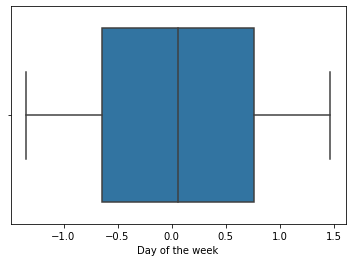

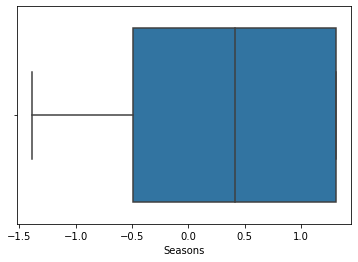

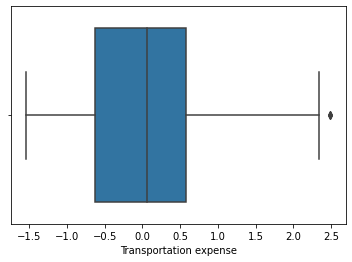

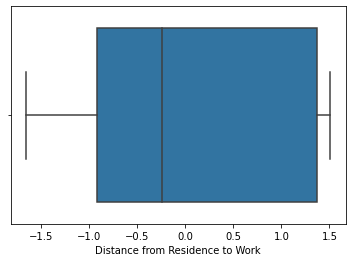

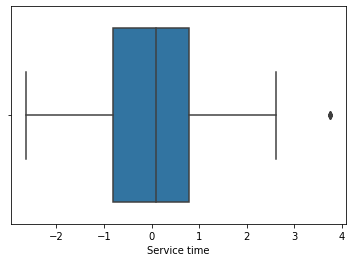

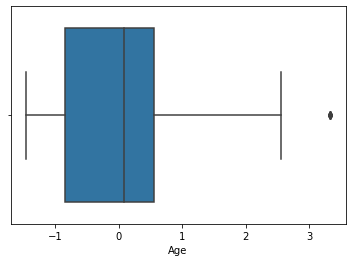

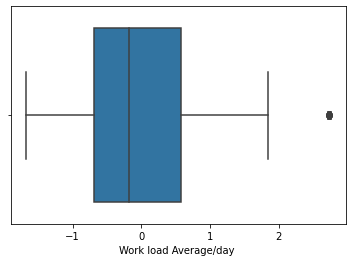

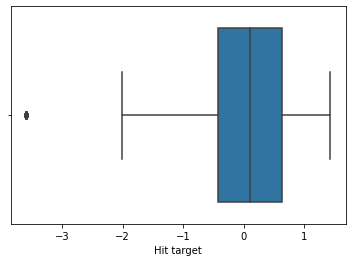

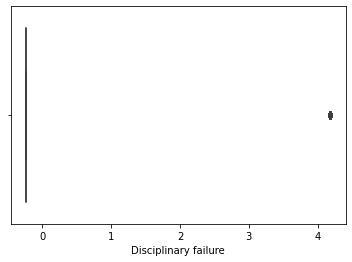

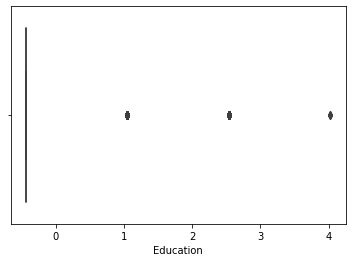

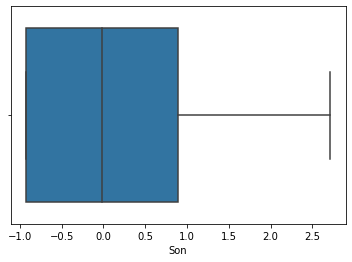

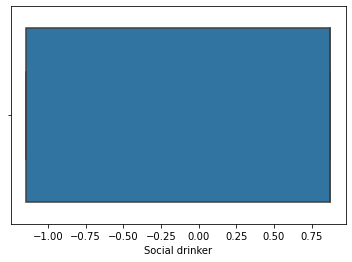

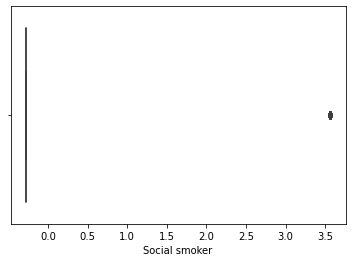

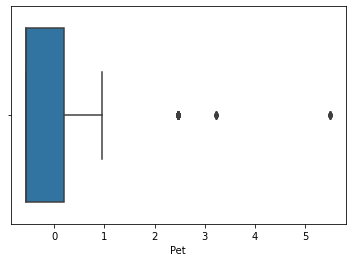

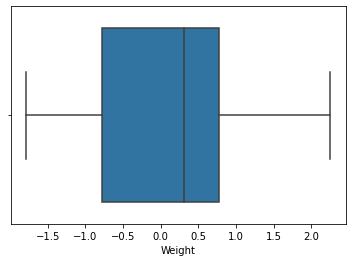

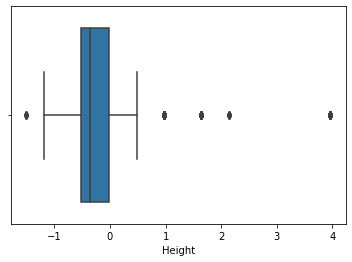

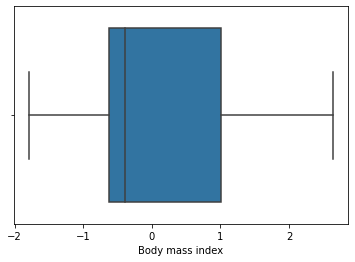

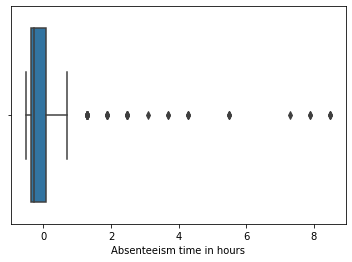

In [14]:
for i in df1.columns:
    sns.boxplot(df1[i])
    plt.show()

##### conclusion: 1) Some outliers In Absenteeism time in hours, Height, Pet outliers are present

<AxesSubplot:xlabel='Absenteeism time in hours', ylabel='count'>

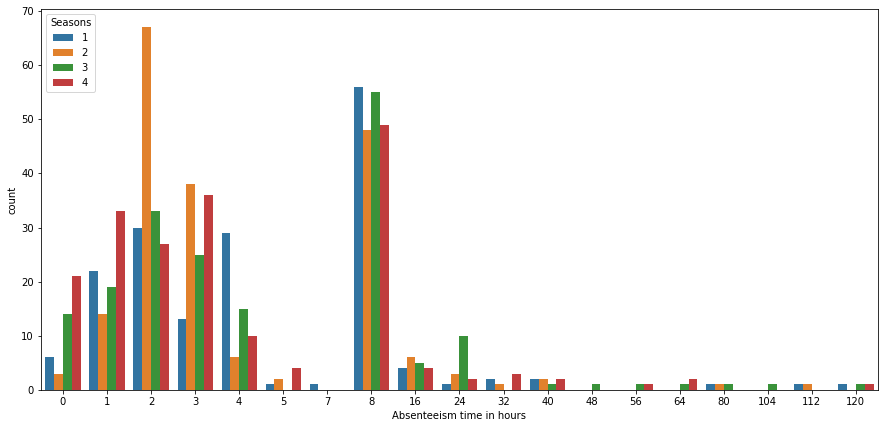

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['Absenteeism time in hours'], hue=df['Seasons'])

#### In most of seasons 8 hours of Absentism time took by employees.

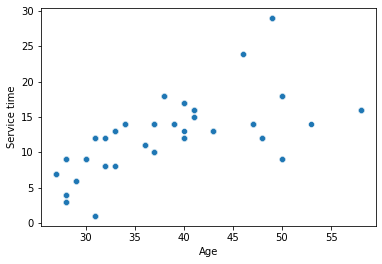

In [16]:
sns.scatterplot(df['Age'], df['Service time']);

#### As age is more service time is more

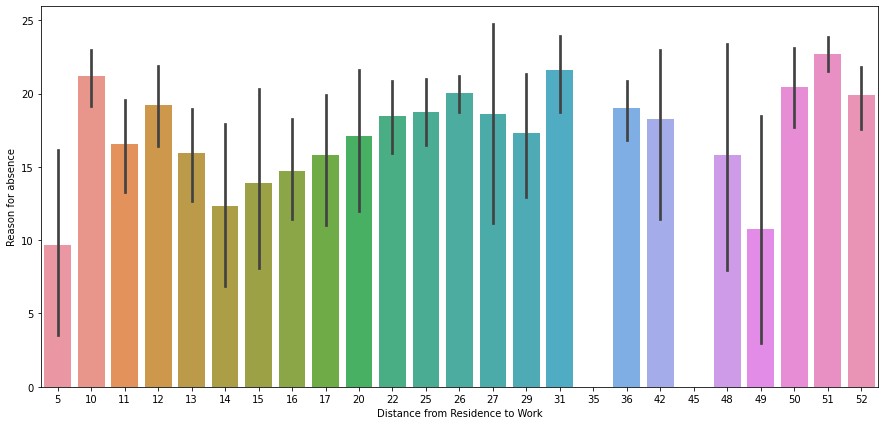

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(df['Distance from Residence to Work'],df['Reason for absence']);

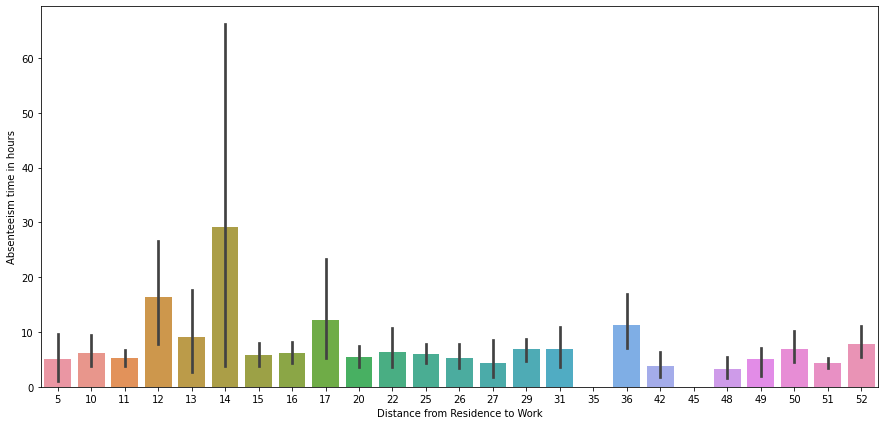

In [18]:
plt.figure(figsize=(15,7))
sns.barplot(df['Distance from Residence to Work'],df['Absenteeism time in hours']);

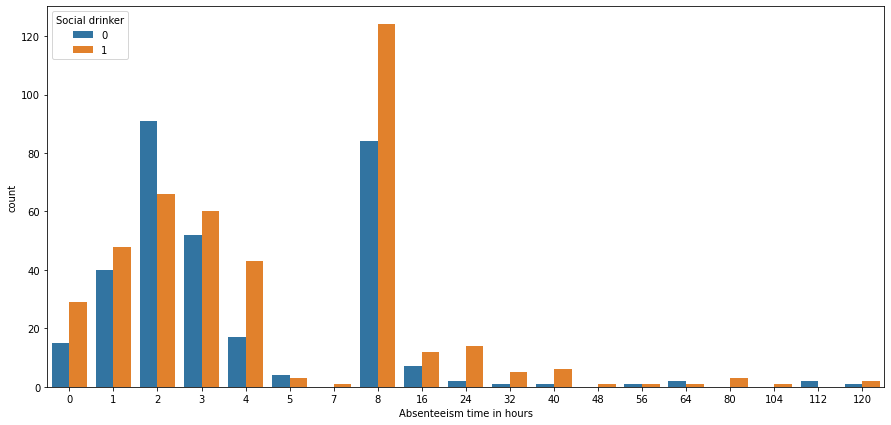

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['Absenteeism time in hours'], hue=df['Social drinker']);

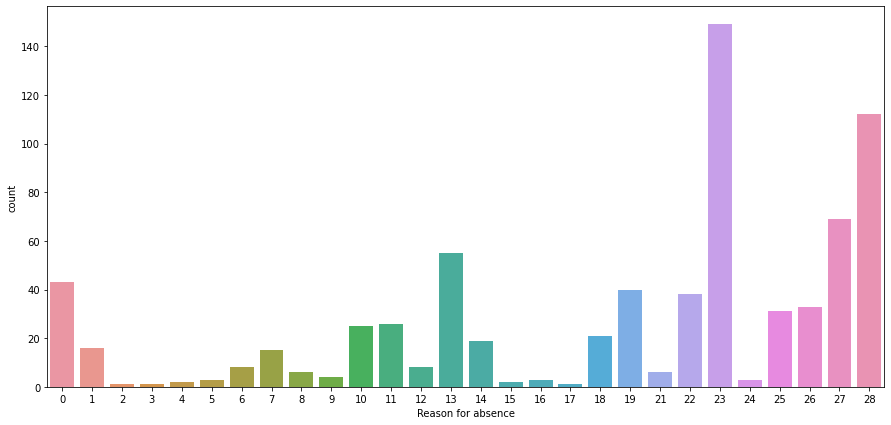

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['Reason for absence']);

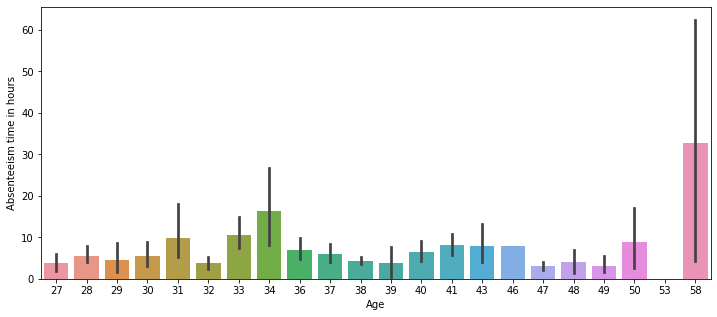

In [21]:
plt.figure(figsize=(12,5))
sns.barplot(df['Age'], df['Absenteeism time in hours']);

#### As age is more more hours of Absenteeism is there.

In [22]:
df1.head()

Reason for absence  Month of absence  Day of the week   Seasons  \
0            0.804938          0.196763        -0.643947 -1.390175   
1           -2.280124          0.196763        -0.643947 -1.390175   
2            0.448970          0.196763         0.059924 -1.390175   
3           -1.449530          0.196763         0.763796 -1.390175   
4            0.448970          0.196763         0.763796 -1.390175   

   Transportation expense  Distance from Residence to Work  Service time  \
0                1.011408                         0.429556      0.101770   
1               -1.544379                        -1.121694      1.242825   
2               -0.632665                         1.441240      1.242825   
3                0.861947                        -1.661258      0.329981   
4                1.011408                         0.429556      0.101770   

        Age  Work load Average/day   Hit target  Disciplinary failure  \
0 -0.532868               -0.818212    0.638686             -0.239046   
1  2.092860               -0.818212    0.638686              4.183300   
2  0.239405               -0.818212    0.638686             -0.239046   
3  0.393859               -0.818212    0.638686             -0.239046   
4 -0.532868               -0.818212    0.638686             -0.239046   

   Education       Son  Social drinker  Social smoker      Pet    Weight  \
0  -0.433857  0.893723        0.872872      -0.280566  0.19285  0.851673   
1  -0.433857 -0.017234        0.872872      -0.280566 -0.56624  1.473056   
2  -0.433857 -0.928191        0.872872      -0.280566 -0.56624  0.774000   
3  -0.433857  0.893723        0.872872       3.564226 -0.56624 -0.857131   
4  -0.433857  0.893723        0.872872      -0.280566  0.19285  0.851673   

     Height  Body mass index  Absenteeism time in hours  
0 -0.019046         0.775932                  -0.219511  
1  0.975828         1.009438                  -0.519767  
2 -0.350671         1.009438                  -0.369639  
3 -0.682295        -0.625100                  -0.219511  
4 -0.019046         0.775932                  -0.369639

In [23]:
x = df1.loc[:,['Reason for absence', 'Month of absence', 'Work load Average/day ','Service time','Hit target', 'Seasons', 'Month of absence', 'Transportation expense', 'Age']]

In [24]:
x

Reason for absence  Month of absence  Work load Average/day   \
0              0.804938          0.196763               -0.818212   
1             -2.280124          0.196763               -0.818212   
2              0.448970          0.196763               -0.818212   
3             -1.449530          0.196763               -0.818212   
4              0.448970          0.196763               -0.818212   
..                  ...               ...                     ...   
735           -0.618937          0.196763               -0.176427   
736           -0.974905          0.196763               -0.176427   
737           -2.280124         -1.841698               -0.006949   
738           -2.280124         -1.841698               -0.006949   
739           -2.280124         -1.841698               -0.006949   

     Service time  Hit target   Seasons  Month of absence  \
0        0.101770    0.638686 -1.390175          0.196763   
1        1.242825    0.638686 -1.390175          0.196763   
2        1.242825    0.638686 -1.390175          0.196763   
3        0.329981    0.638686 -1.390175          0.196763   
4        0.101770    0.638686 -1.390175          0.196763   
..            ...         ...       ...               ...   
735      0.101770   -0.420423 -1.390175          0.196763   
736      0.329981   -0.420423 -1.390175          0.196763   
737      0.101770    0.109131 -1.390175         -1.841698   
738      0.329981    0.109131 -0.490149         -1.841698   
739      0.329981    0.109131  0.409877         -1.841698   

     Transportation expense       Age  
0                  1.011408 -0.532868  
1                 -1.544379  2.092860  
2                 -0.632665  0.239405  
3                  0.861947  0.393859  
4                  1.011408 -0.532868  
..                      ...       ...  
735                1.011408 -0.532868  
736                0.204318  0.084950  
737               -1.544379  0.548314  
738                0.144533  0.393859  
739               -0.632665  2.556224  

[740 rows x 9 columns]

##### feature extraction

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=15)
pca_df=pca.fit_transform(df1)
pca_ratio=pca.explained_variance_ratio_
pca_ratio

array([0.16702204, 0.1128799 , 0.09763493, 0.07674312, 0.07112596,
       0.06414451, 0.05664231, 0.05125224, 0.04833022, 0.04670914,
       0.04041164, 0.03784817, 0.03214685, 0.02269626, 0.02043744])

In [27]:
np.sum(pca_ratio)

0.9460247297294992

### KMeans

In [28]:
np.sqrt(len(pca_df))

27.202941017470888

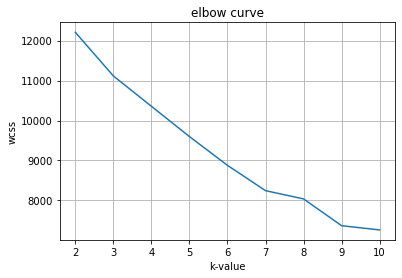

In [29]:
from sklearn.cluster import KMeans

list1 = []

for i in range(2,11):
    m1 = KMeans(n_clusters=i)
    m1.fit(pca_df)
    list1.append(m1.inertia_)
    
plt.plot(range(2,11), list1)
plt.grid(True)
plt.xlabel('k-value')
plt.ylabel('wcss')
plt.title('elbow curve');


In [30]:
from sklearn.metrics import silhouette_score

for i in range(2,11):
    m2 = KMeans(n_clusters=i)
    m2.fit_predict(pca_df)
    sil = silhouette_score(pca_df, m2.labels_)
    print('sil_score for k :', i , 'is', sil)

sil_score for k : 2 is 0.13379887289608583
sil_score for k : 3 is 0.14853138853413783
sil_score for k : 4 is 0.15453883895144396
sil_score for k : 5 is 0.16270056242745223
sil_score for k : 6 is 0.17572282269574224
sil_score for k : 7 is 0.19429961815111182
sil_score for k : 8 is 0.20441916894077894
sil_score for k : 9 is 0.2138066621469795
sil_score for k : 10 is 0.21022732358166912


In [31]:
m3 = KMeans(n_clusters=3)
km_pca = m3.fit_predict(pca_df)

In [32]:
df1['km_pca']=km_pca
df1.head()

Reason for absence  Month of absence  Day of the week   Seasons  \
0            0.804938          0.196763        -0.643947 -1.390175   
1           -2.280124          0.196763        -0.643947 -1.390175   
2            0.448970          0.196763         0.059924 -1.390175   
3           -1.449530          0.196763         0.763796 -1.390175   
4            0.448970          0.196763         0.763796 -1.390175   

   Transportation expense  Distance from Residence to Work  Service time  \
0                1.011408                         0.429556      0.101770   
1               -1.544379                        -1.121694      1.242825   
2               -0.632665                         1.441240      1.242825   
3                0.861947                        -1.661258      0.329981   
4                1.011408                         0.429556      0.101770   

        Age  Work load Average/day   Hit target  ...  Education       Son  \
0 -0.532868               -0.818212    0.638686  ...  -0.433857  0.893723   
1  2.092860               -0.818212    0.638686  ...  -0.433857 -0.017234   
2  0.239405               -0.818212    0.638686  ...  -0.433857 -0.928191   
3  0.393859               -0.818212    0.638686  ...  -0.433857  0.893723   
4 -0.532868               -0.818212    0.638686  ...  -0.433857  0.893723   

   Social drinker  Social smoker      Pet    Weight    Height  \
0        0.872872      -0.280566  0.19285  0.851673 -0.019046   
1        0.872872      -0.280566 -0.56624  1.473056  0.975828   
2        0.872872      -0.280566 -0.56624  0.774000 -0.350671   
3        0.872872       3.564226 -0.56624 -0.857131 -0.682295   
4        0.872872      -0.280566  0.19285  0.851673 -0.019046   

   Body mass index  Absenteeism time in hours  km_pca  
0         0.775932                  -0.219511       1  
1         1.009438                  -0.519767       0  
2         1.009438                  -0.369639       0  
3        -0.625100                  -0.219511       2  
4         0.775932                  -0.369639       1  

[5 rows x 21 columns]

In [33]:
df1.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'km_pca'],
      dtype='object')

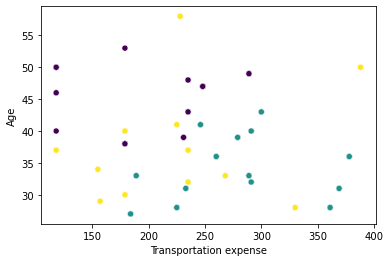

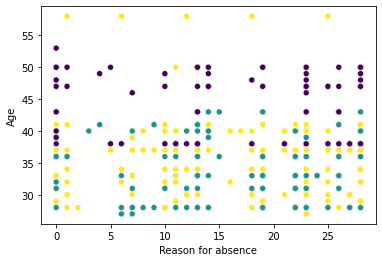

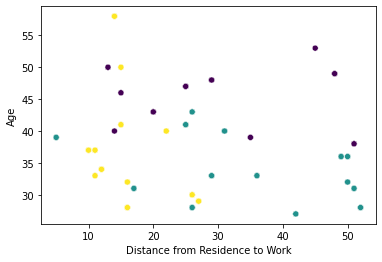

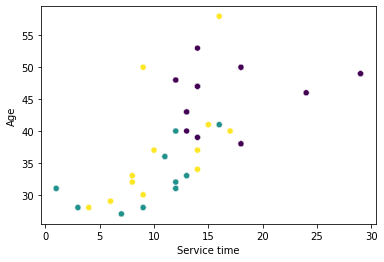

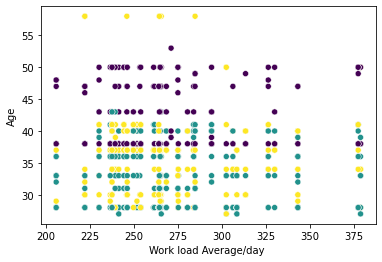

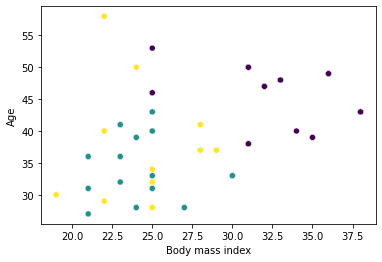

In [34]:
col = ['Transportation expense', 'Reason for absence','Distance from Residence to Work',
       'Service time', 'Work load Average/day ', 'Body mass index']
for i in col:
    
    sns.scatterplot(df[i], df['Age'], c = df1['km_pca'])
    plt.show()

In [35]:
import plotly.express as px
from sklearn.manifold import TSNE

# 3 clusters
km = KMeans(n_clusters=3).fit(pca_df)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10, random_state=24).fit_transform( pca_df )
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km.labels_])
fig.show()

In [36]:
X_embedded

array([[ -3.032673  ,   2.0260959 ,   0.85488194],
       [  4.2554803 ,  -3.8456717 , -16.432016  ],
       [-12.9515505 , -12.072943  ,   0.8135487 ],
       ...,
       [  3.520367  ,  -0.5287404 ,  -1.6071341 ],
       [  3.063921  ,  -0.28202277,  -1.0518614 ],
       [  9.396935  ,   7.8974977 ,   5.9655356 ]], dtype=float32)

In [37]:
# kmeans without pca

In [38]:
m4 = KMeans(n_clusters=3)
kmeans = m4.fit_predict(df1)

In [39]:
df1['kmeans'] = kmeans

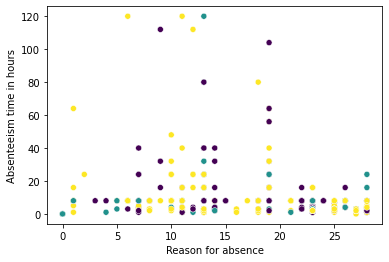

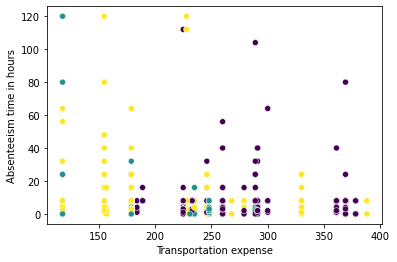

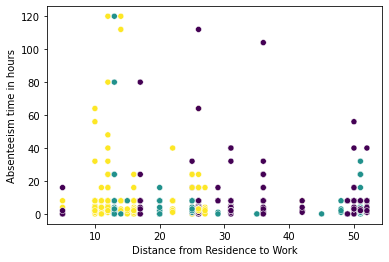

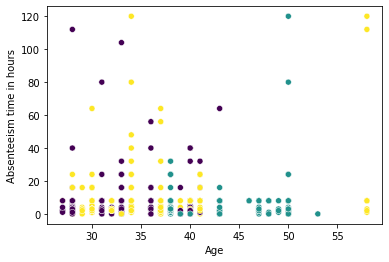

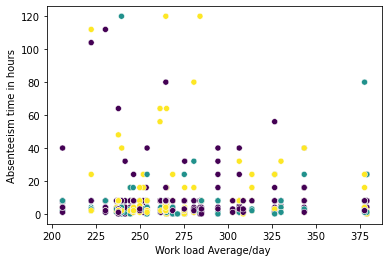

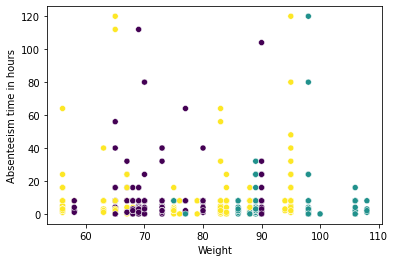

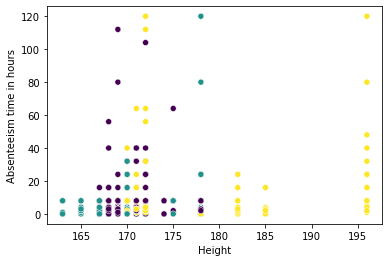

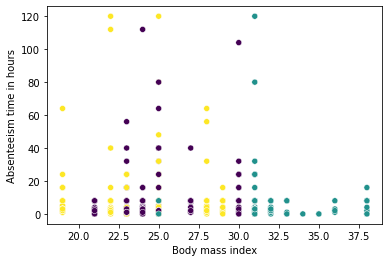

In [40]:
col = ['Reason for absence','Transportation expense', 'Distance from Residence to Work',
       'Age', 'Work load Average/day ','Weight', 'Height', 'Body mass index']
for i in col:
    
    sns.scatterplot(df[i], df['Absenteeism time in hours'], c = df1['kmeans'])
    plt.show()

In [41]:
print('pca_kmeans sil_score:',metrics.silhouette_score(df1, df1['km_pca']))

pca_kmeans sil_score: 0.17049322014313636


In [42]:
print('kmeans sil_score:',metrics.silhouette_score(df1, df1['kmeans']))

kmeans sil_score: 0.17049322014313636


### Agglomerativeclustering

In [43]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [44]:
x = df1.loc[:,['Reason for absence', 'Month of absence']].values

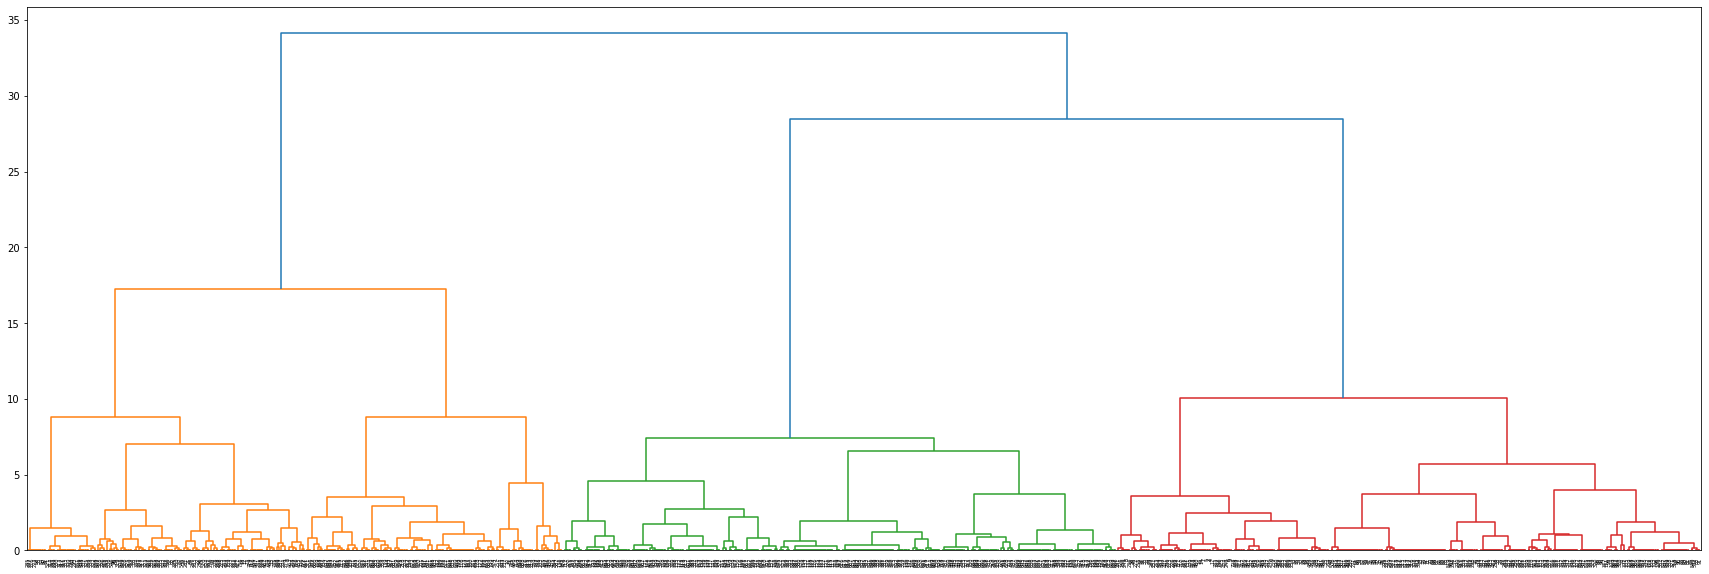

In [45]:
plt.figure(figsize=(30,10))
den = sch.dendrogram(sch.linkage(x, method='ward'), labels=df1.index)
plt.show()

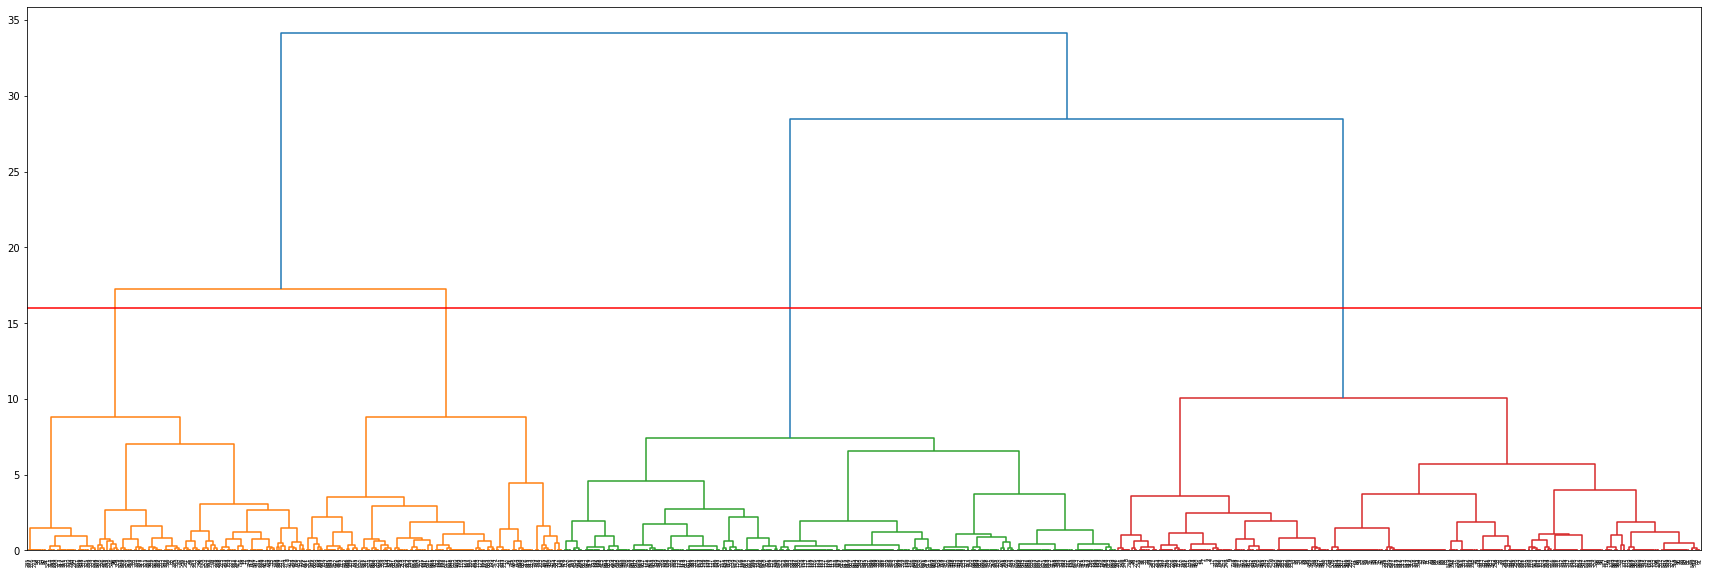

In [46]:
plt.figure(figsize=(30,10))
den = sch.dendrogram(sch.linkage(x, method='ward'), labels=df1.index)
plt.axhline(y=16, color='red')
plt.show()

In [47]:
for i in range(2,11):

    m5 = AgglomerativeClustering(n_clusters=i)
    m5.fit(pca_df)
    sil1 = silhouette_score(pca_df, m5.labels_)
    print('sil_score for k:',i,'is',sil1)

sil_score for k: 2 is 0.10533008260192785
sil_score for k: 3 is 0.130399284988405
sil_score for k: 4 is 0.14661700747280018
sil_score for k: 5 is 0.14960251247808729
sil_score for k: 6 is 0.1692366431729823
sil_score for k: 7 is 0.18741483192191272
sil_score for k: 8 is 0.19262158739200122
sil_score for k: 9 is 0.20345185233886742
sil_score for k: 10 is 0.2138113383528165


In [48]:
agg = AgglomerativeClustering(n_clusters=4)
pca_agg = agg.fit_predict(pca_df)

In [49]:
df1['pca_agg']=pca_agg

In [50]:
print('pca_Agglo sil_score:',metrics.silhouette_score(df1, df1['pca_agg']))

pca_Agglo sil_score: 0.16175509249721542


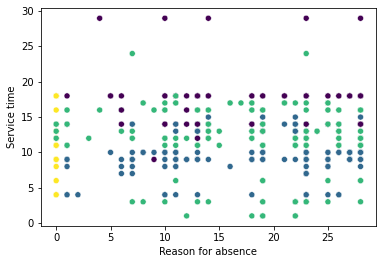

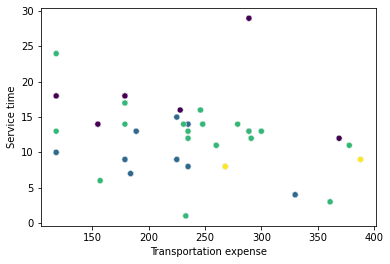

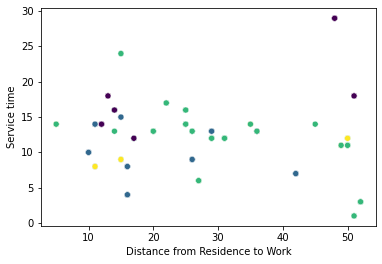

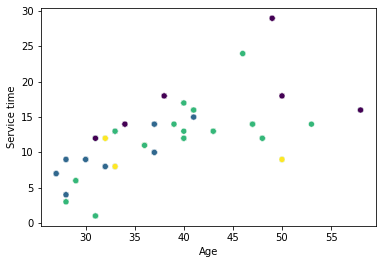

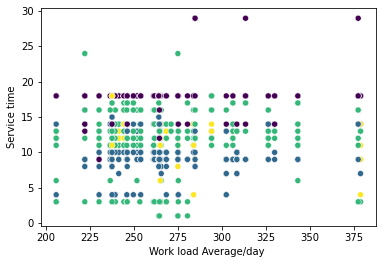

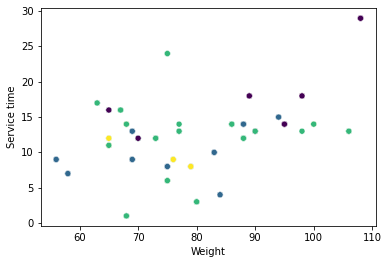

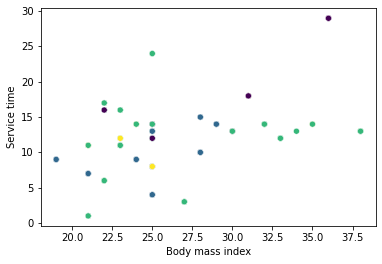

In [51]:
col = ['Reason for absence','Transportation expense', 'Distance from Residence to Work',
       'Age', 'Work load Average/day ','Weight','Body mass index']
for i in col:
    
    sns.scatterplot(df[i], df['Service time'], c = df1['pca_agg'])
    plt.show()

In [52]:
agg2 = AgglomerativeClustering(n_clusters=4)
wt_pca_agg = agg.fit_predict(df1)

In [53]:
df1['wt_pca_agg']=wt_pca_agg

In [54]:
print('wt_Agglo sil_score:',metrics.silhouette_score(df1, df1['wt_pca_agg']))

wt_Agglo sil_score: 0.187590137702323


#### DBSCAN

In [55]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
nbrs=neigh.fit(x)

In [56]:
distance, indices = nbrs.kneighbors(x)

In [57]:
distance = np.sort(distance, axis=0)
distance = distance[:,1]

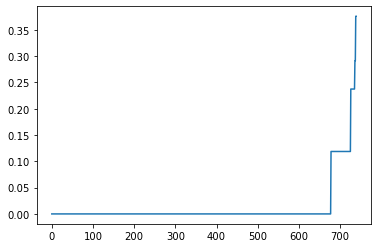

In [58]:
plt.plot(distance)


In [59]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.65, min_samples=6)
dbs_pca = dbs.fit_predict(pca_df)
dbs_pca

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [60]:
eps=0.65

for i in range(2,11):
    clusterer = DBSCAN(eps=eps, min_samples=i)
    clus_labels = clusterer.fit_predict(x)
    X = clus_labels+2
    Y = np.bincount(X)
    ii = np.nonzero(Y)[0]
    result = list(zip(ii,Y[ii]))
    
    print('eps=', eps, '|min_samples=', i, '| obtained clustering=', result)

eps= 0.65 |min_samples= 2 | obtained clustering= [(2, 740)]
eps= 0.65 |min_samples= 3 | obtained clustering= [(2, 740)]
eps= 0.65 |min_samples= 4 | obtained clustering= [(2, 740)]
eps= 0.65 |min_samples= 5 | obtained clustering= [(2, 740)]
eps= 0.65 |min_samples= 6 | obtained clustering= [(2, 740)]
eps= 0.65 |min_samples= 7 | obtained clustering= [(2, 740)]
eps= 0.65 |min_samples= 8 | obtained clustering= [(2, 740)]
eps= 0.65 |min_samples= 9 | obtained clustering= [(2, 740)]
eps= 0.65 |min_samples= 10 | obtained clustering= [(2, 740)]


In [61]:
dbs = DBSCAN(eps=0.65, min_samples=2)
dbs_pca = dbs.fit_predict(pca_df)

In [62]:
df1['dbs_pca'] = dbs_pca

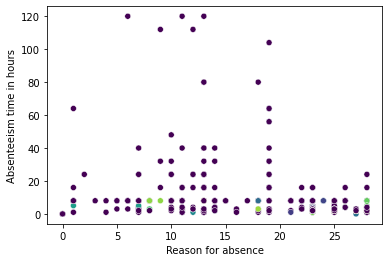

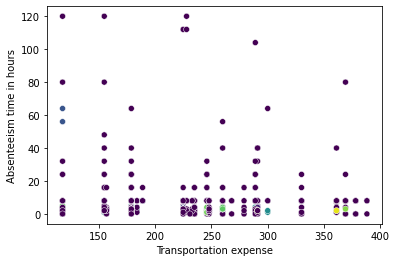

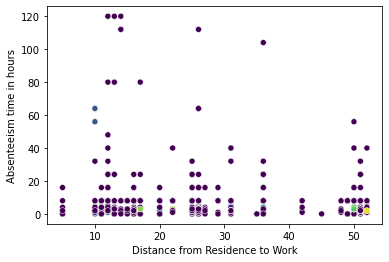

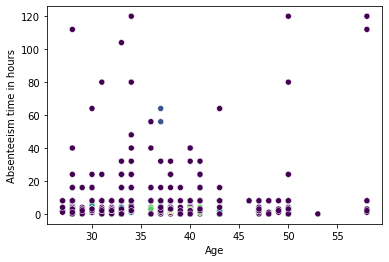

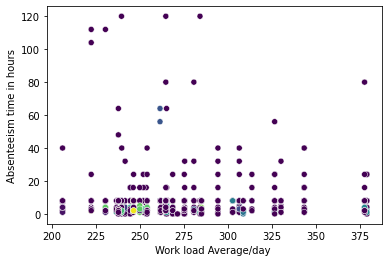

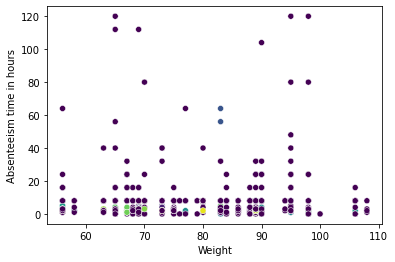

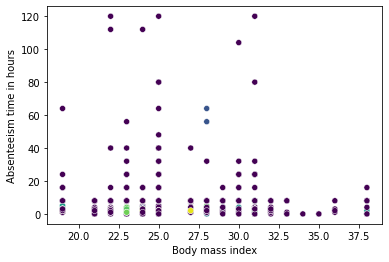

In [63]:
col = ['Reason for absence','Transportation expense', 'Distance from Residence to Work',
       'Age', 'Work load Average/day ','Weight','Body mass index']
for i in col:
    
    sns.scatterplot(df[i], df['Absenteeism time in hours'], c = df1['dbs_pca'])
    plt.show()

In [64]:
print('DBSCAN sil_score:',metrics.silhouette_score(df1, df1['dbs_pca']))

DBSCAN sil_score: 0.16029882968778658


In [65]:
dbs2 = DBSCAN(eps=0.65, min_samples=2)
wt_dbs_pca = dbs2.fit_predict(df1)

df1['wt_pca_dbs'] = wt_dbs_pca

In [66]:
print('wt_DBSCAN sil_score:',metrics.silhouette_score(df1, df1['wt_pca_dbs']))

wt_DBSCAN sil_score: 0.017775265228084675


In [68]:
a = {'result':['silhouette score'], 'kmeans_with_pca':[0.170], 'kmeans_without_pca':[0.170], 'Agglomerative_with_pca':[0.161],'Agglomerative_without_pca':[0.187], 'DBSCAN_with_pca':[0.168],'DBSCAN_without_pca':[0.01]}
pd.DataFrame(a)

result  kmeans_with_pca  kmeans_without_pca  \
0  silhouette score             0.17                0.17   

   Agglomerative_with_pca  Agglomerative_without_pca  DBSCAN_with_pca  \
0                   0.161                      0.187            0.168   

   DBSCAN_without_pca  
0                0.01